# Predicting vigilance using machine learning
## Random forest building
Rosalie Lucas


In [3]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# Installed Graphviz using Pip3

In [8]:
data_file_path = '/Users/roos/Data/test_data.csv'
data_file = pd.read_csv(data_file_path)

for column in data_file:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_file[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_file.isnull().sum())

The number of values for feature 0 : 100
The number of values for feature 1 : 100
The number of values for feature 2 : 100
The number of values for feature 3 : 100
The number of values for feature 4 : 2 -- [0. 1.]
0    0
1    0
2    0
3    0
4    0
dtype: int64


Index(['0', '1', '2', '3', '4'], dtype='object')

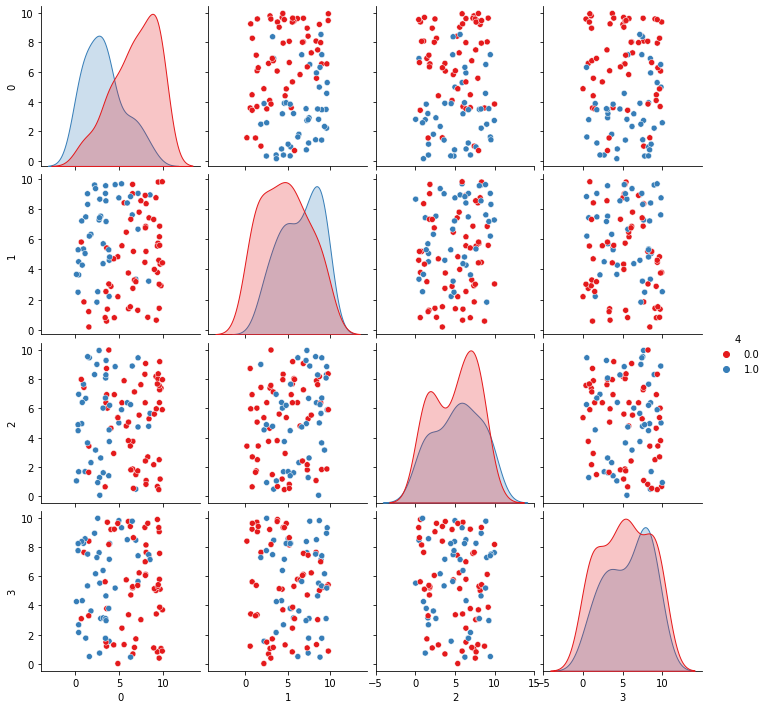

In [9]:
plot = sns.pairplot(data_file, hue='4', palette="Set1")

In [ ]:
# Splitting the data
X = data_file.drop('4', axis=1).values
Y = data_file['4'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
